# Assignment 3
All questions are weighted the same in this assignment. This assignment requires more individual learning then the last one did - you are encouraged to check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/) to find functions or methods you might not have used yet, or ask questions on [Stack Overflow](http://stackoverflow.com/) and tag them as pandas and python related. All questions are worth the same number of points except question 1 which is worth 17% of the assignment grade.

**Note**: Questions 3-13 rely on your question 1 answer.

In [3]:
import pandas as pd
import numpy as np

# Filter all warnings. If you would like to see the warnings, please comment the two lines below.
import warnings
warnings.filterwarnings('ignore')

### Question 1
Load the energy data from the file `assets/Energy Indicators.xls`, which is a list of indicators of [energy supply and renewable electricity production](assets/Energy%20Indicators.xls) from the [United Nations](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013, and should be put into a DataFrame with the variable name of **Energy**.

Keep in mind that this is an Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

`['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable]`

Convert `Energy Supply` to gigajoules (**Note: there are 1,000,000 gigajoules in a petajoule**). For all countries which have missing data (e.g. data with "...") make sure this is reflected as `np.NaN` values.

Rename the following list of countries (for use in later questions):

```"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"```

There are also several countries with numbers and/or parenthesis in their name. Be sure to remove these, e.g. `'Bolivia (Plurinational State of)'` should be `'Bolivia'`.  `'Switzerland17'` should be `'Switzerland'`.

Next, load the GDP data from the file `assets/world_bank.csv`, which is a csv containing countries' GDP from 1960 to 2015 from [World Bank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD). Call this DataFrame **GDP**. 

Make sure to skip the header, and rename the following list of countries:

```"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"```

Finally, load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102) from the file `assets/scimagojr-3.xlsx`, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame **ScimEn**.

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15). 

The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

*This function should return a DataFrame with 20 columns and 15 entries, and the rows of the DataFrame should be sorted by "Rank".*

In [94]:
def readEnergy():
    colname = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
    df = pd.read_excel("assets/Energy Indicators.xls",header=17,usecols=[2,3,4,5], skip_footer=38).rename(columns={'Unnamed: 2':'Country','Petajoules':'Energy Supply','%':'% Renewable','Gigajoules':'Energy Supply per Capita'})
    df[['Energy Supply', 'Energy Supply per Capita', '% Renewable']]=df[['Energy Supply', 'Energy Supply per Capita', '% Renewable']].replace('...',np.NaN).apply(pd.to_numeric) 
    df['Energy Supply'] = df['Energy Supply']* 1000000
    repl = lambda m : m.group('one') + m.group('three')
    replnum = lambda m: m.group('one')+m.group('two')
    df['Country'] = df['Country'].str.replace(r"^(?P<one>.*)(?P<two>s*\(s*.*s*\)s*)(?P<three>.*)$", repl, regex=True).str.strip()
    df['Country'] = df['Country'].str.replace(r'^(?P<one>[^\(\)0-9]+)[\(\)0-9]+(?P<two>.*)$', replnum, regex=True)
    df['Country'] = df['Country'].replace({'China, Hong Kong Special Administrative Region':'Hong Kong','United Kingdom of Great Britain and Northern Ireland':'United Kingdom','Republic of Korea':'South Korea','United States of America':'United States', 'China, Macao Special Administrative Region':'Macao'})
    Energy =df
    return Energy
def readGDP():
    df = pd.read_csv("assets/world_bank.csv", header=4)
    colname = ['Country Name', 'Country Code']
    df[colname[0]] = df[colname[0]].replace({'Hong Kong SAR, China':'Hong Kong','Korea, Rep.':'South Korea', 'Macao SAR, China':'Macao'})
    df[colname[0]] = df[colname[0]].str.replace(r'^(?P<one>[^,]+)(,.*)$', lambda m : m.group('one'), regex=True)
    GDP = df
    return GDP
def readScimEn():
    df = pd.read_excel("assets/scimagojr-3.xlsx")
    df[['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index']]= df[['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index']].apply(pd.to_numeric)
    df.sort_values(by='Rank')
    ScimEn = df
    return ScimEn
def mergeAll():
    Energy = readEnergy()
    GDP = readGDP()
    mGDP = GDP[['Country Name','Country Code','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']]
    ScimEn = readScimEn()
    df = Energy.merge(mGDP, how='inner', left_on='Country', right_on='Country Name').merge(ScimEn, how='inner', left_on='Country', right_on='Country')
    df.sort_values(by='Rank',inplace=True)
    df = df.set_index('Country')
    df = df[['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
    return df
def answer_one():
    # YOUR CODE HERE
    df = mergeAll()
    df = df.head(15)
    #pd.set_option('display.max_rows', df.shape[0]+1)
    #print(df)
    return df
    raise NotImplementedError()

In [95]:
assert type(answer_one()) == pd.DataFrame, "Q1: You should return a DataFrame!"

assert answer_one().shape == (15,20), "Q1: Your DataFrame should have 20 columns and 15 entries!"


In [96]:
# Cell for autograder.


### Question 2
The previous question joined three datasets then reduced this to just the top 15 entries. When you joined the datasets, but before you reduced this to the top 15 items, how many entries did you lose?

*This function should return a single number.*

In [97]:
%%HTML
<svg width="800" height="300">
  <circle cx="150" cy="180" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="blue" />
  <circle cx="200" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="red" />
  <circle cx="100" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="green" />
  <line x1="150" y1="125" x2="300" y2="150" stroke="black" stroke-width="2" fill="black" stroke-dasharray="5,3"/>
  <text x="300" y="165" font-family="Verdana" font-size="35">Everything but this!</text>
</svg>

In [177]:
def answer_two():
    # YOUR CODE HERE
    Energy = readEnergy()
    GDP = readGDP()
    mGDP = GDP[['Country Name','Country Code','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']]
    mGDP.rename(columns={'Country Name':'Country'},inplace=True)
    ScimEn = readScimEn()
    inner1 = Energy.merge(mGDP, how='inner', left_on='Country', right_on='Country')
    inner2 = inner1.merge(ScimEn, how='inner', left_on='Country', right_on='Country')
    outer1 = Energy.merge(mGDP, how='outer', left_on='Country', right_on='Country')
    outer2 = outer1.merge(ScimEn, how='outer', left_on='Country', right_on='Country')
    count1 = len(outer2)
    count2 = len(inner2)
    #print(count1,count2)
    return (count1-count2)
    raise NotImplementedError()

In [178]:
assert type(answer_two()) == int, "Q2: You should return an int number!"


308 169


### Question 3
What are the top 15 countries for average GDP over the last 10 years?

*This function should return a Series named `avgGDP` with 15 countries and their average GDP sorted in descending order.*

In [141]:
def withAvgGDP():
    #GDP = readGDP()
    df = answer_one()
    avgGDP = df[['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']].mean(axis=1)
    df['avgGDP']= avgGDP
    return df
def answer_three():
    # YOUR CODE HERE
    df = withAvgGDP()
    df = df.sort_values(by='avgGDP',ascending=False).loc[:,['Country','Rank','avgGDP']].iloc[0:15]
    ans = df['avgGDP']
    return ans
    raise NotImplementedError()

In [142]:
assert type(answer_three()) == pd.Series, "Q3: You should return a Series!"


### Question 4
By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

*This function should return a single number.*

In [143]:
def answer_four():
    # YOUR CODE HERE
    df = answer_one()
    avgGDP = df[['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']].mean(axis=1)
    df['avgGDP']= avgGDP
    df = df.sort_values(by='avgGDP',ascending=False).iloc[0:15]  
    df["changed"] = df["2015"]-df["2006"]
    res = df.iloc[5]["changed"]
    print (res)
    #print(df)
    return res
    raise NotImplementedError()

In [91]:
# Cell for autograder.


### Question 5
What is the mean energy supply per capita?

*This function should return a single number.*

In [88]:
def answer_five():
    # YOUR CODE HERE
    df = answer_one()
    #print(Energy["Energy Supply per capita"].mean())
    #print(df["Energy Supply per Capita"].mean())
    return df["Energy Supply per Capita"].mean()
    raise NotImplementedError()

In [89]:
# Cell for autograder.


### Question 6
What country has the maximum % Renewable and what is the percentage?

*This function should return a tuple with the name of the country and the percentage.*

In [132]:
def answer_six():
    # YOUR CODE HERE
    df = answer_one()
    df.reset_index(inplace=True)
    ans = df.loc[df["% Renewable"].idxmax()]
    res = ans["Country"], ans["% Renewable"] 
    #print(res)
    return res
    raise NotImplementedError()

In [133]:
assert type(answer_six()) == tuple, "Q6: You should return a tuple!"

assert type(answer_six()[0]) == str, "Q6: The first element in your result should be the name of the country!"


('Brazil', 69.64803)
('Brazil', 69.64803)


### Question 7
Create a new column that is the ratio of Self-Citations to Total Citations. 
What is the maximum value for this new column, and what country has the highest ratio?

*This function should return a tuple with the name of the country and the ratio.*

In [197]:
def answer_seven():
    # YOUR CODE HERE
    df = mergeAll()
    df.reset_index(inplace=True)
    df["ratio"] = df["Self-citations"]/df["Citations"]
    ans = df.loc[df["ratio"].idxmax()]
    #print(ans["Country"])
    #print(ans["ratio"])
    return ans["Country"], ans["ratio"]
    raise NotImplementedError()

In [198]:
assert type(answer_seven()) == tuple, "Q7: You should return a tuple!"

assert type(answer_seven()[0]) == str, "Q7: The first element in your result should be the name of the country!"


### Question 8

Create a column that estimates the population using Energy Supply and Energy Supply per capita. 
What is the third most populous country according to this estimate?

*This function should return the name of the country*

In [113]:
def answer_eight():
    # YOUR CODE HERE
    df = answer_one()
    df.reset_index(inplace=True)
    df["popuEst"]=df["Energy Supply"]/df["Energy Supply per Capita"]
    df1 = df.sort_values(by='popuEst',ascending=False).iloc[0:15]
    #df = df.sort_values(by='Energy',ascending=False).iloc[0:15]
    #print(df1)
    return df1.iloc[2]["Country"]
    raise NotImplementedError()

In [114]:
assert type(answer_eight()) == str, "Q8: You should return the name of the country!"


               Country  Rank  Documents  Citable documents  Citations  \
0                China     1     127050             126767     597237   
7                India     8      15005              14841     128763   
1        United States     2      96661              94747     792274   
14              Brazil    15       8668               8596      60702   
4   Russian Federation     5      18534              18301      34266   
2                Japan     3      30504              30287     223024   
6              Germany     7      17027              16831     140566   
12                Iran    13       8896               8819      57470   
3       United Kingdom     4      20944              20357     206091   
8               France     9      13153              12973     130632   
10               Italy    11      10964              10794     111850   
9          South Korea    10      11983              11923     114675   
11               Spain    12       9428            

### Question 9
Create a column that estimates the number of citable documents per person. 
What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the `.corr()` method, (Pearson's correlation).

*This function should return a single number.*

*(Optional: Use the built-in function `plot9()` to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita)*

In [115]:
def answer_nine():
    # YOUR CODE HERE
    df = answer_one()
    
    df["Energy Supply per Capita"] = pd.to_numeric(df["Energy Supply per Capita"])
    df["popuEst"]=pd.to_numeric(df["Energy Supply"]/df["Energy Supply per Capita"])
    df["Citable documents per Capita"]= df["Citable documents"]/df["popuEst"]
    ndf = df[["Citable documents per Capita","Energy Supply per Capita"]]
    #print(ndf)
    correlation = ndf["Citable documents per Capita"].corr(ndf["Energy Supply per Capita"])
    #print(correlation)
    return correlation
    raise NotImplementedError()

In [116]:
def plot9():
    import matplotlib as plt
    %matplotlib inline
    
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])

In [117]:
assert answer_nine() >= -1. and answer_nine() <= 1., "Q9: A valid correlation should between -1 to 1!"


0.7940010435442946
0.7940010435442946


### Question 10
Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.

*This function should return a series named `HighRenew` whose index is the country name sorted in ascending order of rank.*

In [206]:
def answer_ten():
    # YOUR CODE HERE
    df = mergeAll()
    df = df.head(15)
    m = df['% Renewable'].median()
    func = lambda v: 1 if v >= m else 0
    df["HighRenew"]= df['% Renewable'].apply(func)
    #print(df["HighRenew"])
    return (df["HighRenew"])
    raise NotImplementedError()

In [207]:
assert type(answer_ten()) == pd.Series, "Q10: You should return a Series!"


### Question 11
Use the following dictionary to group the Countries by Continent, then create a DataFrame that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

```python
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
```

*This function should return a DataFrame with index named Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` and columns `['size', 'sum', 'mean', 'std']`*

In [208]:
def answer_eleven():
    # YOUR CODE HERE
    df = mergeAll()
    df = df.head(15)
    df["Energy Supply per Capita"] = pd.to_numeric(df["Energy Supply per Capita"])
    df["popuEst"]=pd.to_numeric(df["Energy Supply"]/df["Energy Supply per Capita"])
    ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
    rowIndex = lambda row : row.name
    continentName = lambda row: ContinentDict[row.name]
    df["Continent"] = df.apply(continentName, axis=1)
    #print(ContinentDict)
    #print(df)
    ndf = df.groupby(by='Continent')['popuEst'].agg(['count','sum','mean','std'])
    ndf.rename(columns={'count':'size'},inplace=True)
    ndf.sort_index(inplace=True)
    #print(ndf)
    return ndf
    raise NotImplementedError()

In [209]:
assert type(answer_eleven()) == pd.DataFrame, "Q11: You should return a DataFrame!"

assert answer_eleven().shape[0] == 5, "Q11: Wrong row numbers!"

assert answer_eleven().shape[1] == 4, "Q11: Wrong column numbers!"


### Question 12
Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

*This function should return a Series with a MultiIndex of `Continent`, then the bins for `% Renewable`. Do not include groups with no countries.*

In [126]:
def answer_twelve():
    # YOUR CODE HERE
    df = answer_one()
    #df = df.head(15)
    #print(df)
    df["Energy Supply per Capita"] = pd.to_numeric(df["Energy Supply per Capita"])
    df["popuEst"]=pd.to_numeric(df["Energy Supply"]/df["Energy Supply per Capita"])
    ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
    df['RenewableBin'] = pd.cut(df['% Renewable'], 5)
    #print(df['RenewableBin'])
    #rowIndex = lambda row : row.name
    continentName = lambda row: ContinentDict[row.name]
    df["Continent"] = df.apply(continentName, axis=1)
    #print(ContinentDict)
    #print(df)
    df.reset_index(inplace=True)
    df = df[['Continent', 'RenewableBin','Country']]
    df.rename(columns={'RenewableBin':'% Renewable'},inplace=True)
    df2 = df.set_index(['Continent', '% Renewable'])[['Country']]
    df3 = df2.groupby(['Continent','% Renewable'])['Country'].count()
    #ndf = df.groupby(by=['Continent','RenewableBin'])['popuEst'].count()
    #ndf.set_index(['Continent','RenewableBin'],inplace=True)
    #print(df3)
    return df3
    raise NotImplementedError()


In [127]:
assert type(answer_twelve()) == pd.Series, "Q12: You should return a Series!"

assert len(answer_twelve()) == 9, "Q12: Wrong result numbers!"


### Question 13
Convert the Population Estimate series to a string with thousands separator (using commas). Use all significant digits (do not round the results).

e.g. 12345678.90 -> 12,345,678.90

*This function should return a series `PopEst` whose index is the country name and whose values are the population estimate string*

In [212]:
def answer_thirteen():
    # YOUR CODE HERE
    df = mergeAll()
    df = df.head(15)
    df["Energy Supply per Capita"] = pd.to_numeric(df["Energy Supply per Capita"])
    df["PopEst"]=pd.to_numeric(df["Energy Supply"]/df["Energy Supply per Capita"])
    df['PopEst'] = df["PopEst"].apply('{:,}'.format)
    #print(df['PopEst'])
    return df['PopEst']
    raise NotImplementedError()

In [213]:
assert type(answer_thirteen()) == pd.Series, "Q13: You should return a Series!"

assert len(answer_thirteen()) == 15, "Q13: Wrong result numbers!"


### Optional

Use the built in function `plot_optional()` to see an example visualization.

In [214]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    Top15 = answer_one()
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")

This is an example of a visualization that can be created to help understand the data. This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' 2014 GDP, and the color corresponds to the continent.


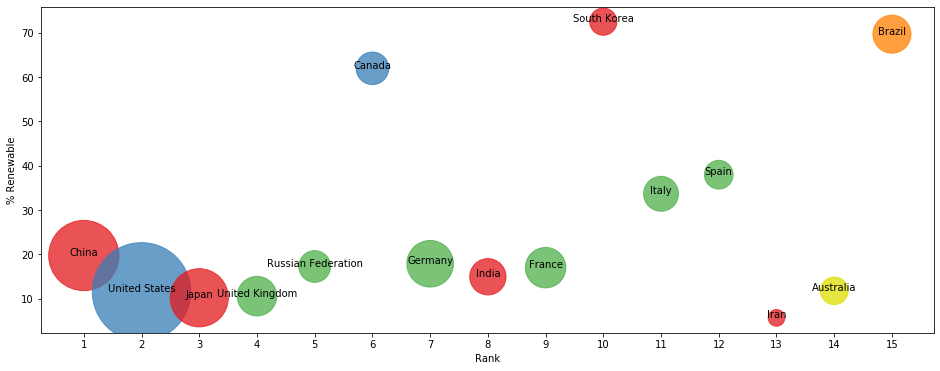

In [215]:
plot_optional()